# 贝叶斯线性回归
## 创建一个数据集 $\mathcal{D}$
本节中我们需要对一个多项式进行拟合, 我们选择 $y = sin(2 \pi x) + \epsilon$, 其中 $\epsilon$ 是一个由 $\mu = 0, \sigma = 0.3$ 的高斯分布生成的噪音. 数据集由 $[0, 1]$ 上等距产生的 10 个点 $\boldsymbol{x} = \{x_1, \cdots, x_10\}$ 所计算出的 $\boldsymbol{y}$. 

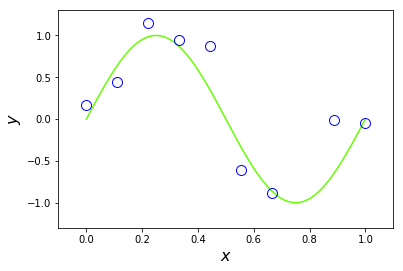

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 构造目标曲线和训练数据集
x = np.linspace(0, 1, 1000)
y = np.sin(2 * np.pi * x)
x_tr = np.linspace(0, 1, 10)
y_tr = np.sin(2 * np.pi * x_tr) + np.random.normal(0, 0.3, 10)
# 画图
plt.plot(x, y, color='#66FF00')
plt.plot(x_tr, y_tr, 'o', markerfacecolor='none', markeredgecolor='b', markersize=10, markeredgewidth=1)
plt.xlim(-0.1, 1.1)
plt.ylim(-1.3, 1.3)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

## 线性模型
用多项式曲线来拟合目标函数:

$$\hat{y}(x, \boldsymbol{w}) = \sum_{j=0}^M w_j x^j$$

> `M` 为多项式的阶, 也就是模型的复杂度(容量)

该模型为线性模型, 误差函数(error function) 可以用测试集上的 **均方误差(mean squared error)**: $\text{MSE}_{\text{test}} = \frac{1}{m} \sum_i(\hat{\boldsymbol{y}}^{(\text{test}))} - \boldsymbol{y}^{(\text{test})})_i^2 = \frac{1}{m} \lVert \hat{\boldsymbol{y}}^{(\text{test})} - \boldsymbol{y}^{(\text{test})}\rVert_2^2$ (越小越好, 也就是平方欧几里德距离除以 $m$ ) 来衡量.

模型的容量导致的过拟合和欠拟合(当 M = 0 和 1 的时候为欠拟合, 当 M = 9 的时候为过拟合):

/home/kevin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


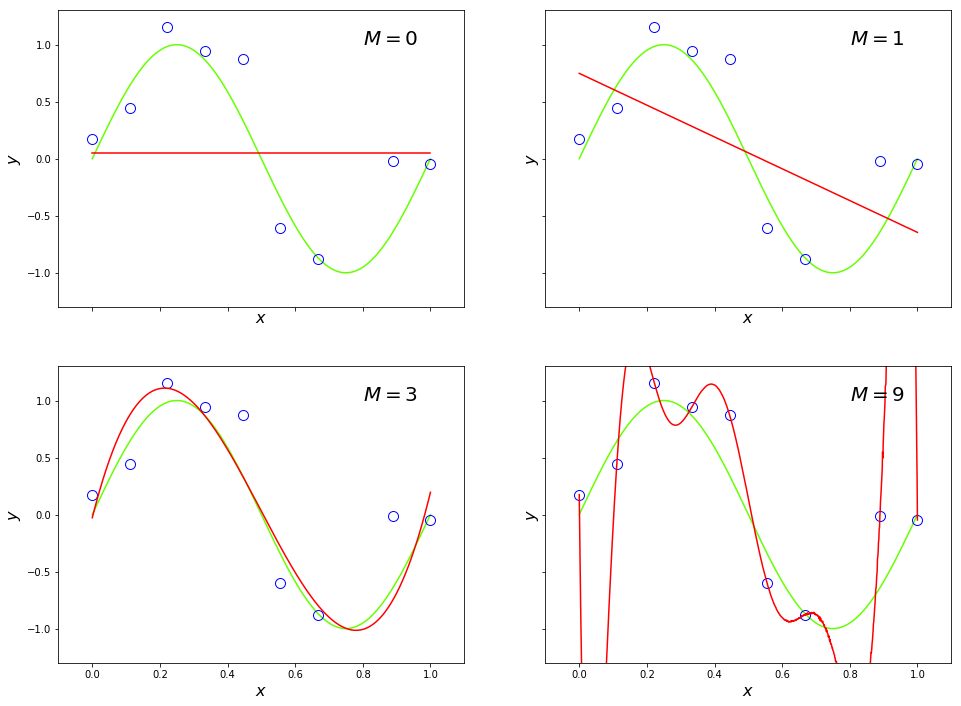

In [12]:
def predict(w, x):
    '''make predictions for x
    # Arguments:
        w: coefficients of the polynomial model
        x: vector of input variables
    # Returns:
        predicted target variables
    '''
    X = np.array([[xx ** m for m in range(M+1)] for xx in x], dtype='float32')
    return X.dot(w) # 点乘


# 模型的不同容量
M_vals = [0, 1, 3, 9]
# 2x2 的子图
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(16,12))
# axes 是形如 [[x_1, y_1], [x_2, y_2]] 的列表(x_1 表示图一的 x 轴), 需要扁平化为 [x_1, y_1, x_2, y_2] 的列表
axes = np.ravel(axes)
for M, ax in zip(M_vals, axes):
    X = np.array([[x_i ** m for m in range(M + 1)] for x_i in x_tr], dtype='float32')
    # the least-squares solution to a linear matrix equation w*X = y_tr
    w = np.linalg.lstsq(X, y_tr)[0]
    ax.plot(x, y, color="#66FF00")
    ax.plot(x_tr, y_tr, 'o',  markerfacecolor='none' ,markeredgecolor='b', markersize=10, markeredgewidth=1)
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-1.3, 1.3)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.plot(x, predict(w, x), 'r-')
    ax.text(0.8, 1, '$M={}$'.format(M), size=20)